In [84]:
import pylab
import numpy as np

1454


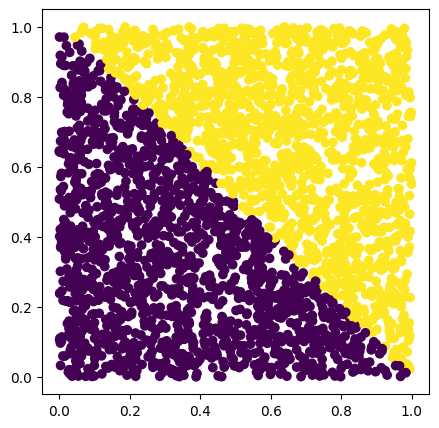

In [140]:
pylab.figure(figsize=(5,5))
X = []
Y = []
for i in range(3000):
  X.append(np.random.uniform())
  Y.append(np.random.uniform())

def d(i, j):
  return np.sqrt((X[i]-X[j])**2 + (Y[i]-Y[j])**2)
color = []
center1 = 1
center2 = -1

maxD = 0

for i in range(3000):
  dis = d(i, center1)
  if dis>maxD:
    maxD=dis
    center2=i

maxD = 0

for i in range(3000):
  dis = d(i, center2)
  if dis>maxD:
    maxD=dis
    center1=i
for i in range(3000):
  if d(i, center2) < d(i, center1):
    color.append(1)
  else:
    color.append(0)
pylab.scatter(X, Y, c=color)
print(np.count_nonzero(color))

In [86]:
class TreeNode:
  def __init__(self, objectA, objectB):
    self.objectA = objectA
    self.objectB = objectB
    if not objectB is None and not objectA is None:
      self.halfway = d(objectA, objectB)
    self.left = None
    self.right = None
  
  def __str__(self):
    return str((self.objectA, self.objectB))

In [87]:
def buildTree(objects):
  if len(objects)==0:
    return None
  if len(objects) == 1:
    root = TreeNode(objects[0], None)
    return root
  elif len(objects) == 2:
    root = TreeNode(objects[0], objects[1])
    return root

  center1 = 50
  center2 = -1

  maxD = -1

  for i in range(len(objects)):
    dis = d(i, center1)
    if dis>maxD:
      maxD=dis
      center2=i
    
  maxD = -1

  for i in range(len(objects)):
    dis = d(i, center2)
    if dis>maxD:
      maxD=dis
      center1=i
  # print(center1, center2, len(objects))
  root = TreeNode(objects[center1], objects[center2])

  del objects[center1]
  if center1<center2:
     del objects[center2-1] #opmization needed
  else:
    del objects[center2] 
  # I got it center1 and 2 are not indexes!!! mix index and ID again
  left = []
  right = []

  for i in objects:
    if d(i, root.objectA) < d(i, root.objectB):
      left.append(i)
    else:
      right.append(i)

  # print(len(left),len(right),len(objects))
  # if root.objectA in left:
  # # if root.objectA in left: wtf not in objects but in left? oh i got it it is range objects i got it
  #   print("WTF")
  root.left = buildTree(left)
  root.right = buildTree(right)
  return root

In [88]:
print(buildTree(list(range(100))).objectA)

35


In [142]:
def searchBF(objects, id, r):
  ans = []
  for i in objects:
    if d(id, i)<=r:
      ans.append(i)
  return ans

In [143]:
len(searchBF(range(21), 19, 0.09))

1

In [151]:
def searchTree(root, id, r, ans):
  if root == None: #empty, since it is not inited
    return
  if root.objectB == None:
    dA = d(root.objectA, id)
    if dA<=r:
      ans.append(root.objectA)
    return

  dA = d(root.objectA, id)
  dB = d(root.objectB, id)
  if dA<=r:
    ans.append(root.objectA)
  if dB <= r:
    ans.append(root.objectB)

  # halfway = d(root.objectA, root.objectB) #(could be precomputed)
  
  if dA-r<=dB+r: 
    searchTree(root.left,id,r, ans)
  if dB-r<=dA+r: 
    searchTree(root.right,id,r, ans)
ans = []
root = buildTree(list(range(21)))
searchTree(root, 19 , 0.09, ans)
len(ans)

1

In [138]:
ans

[6, 16, 19, 1]

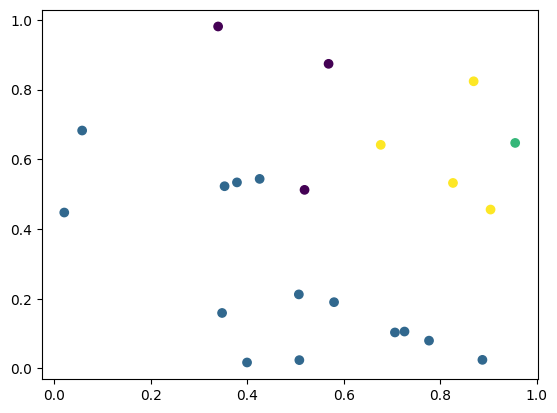

In [137]:
for i in [1, 6, 9, 16, 19]:
  color[i]=3
color[19]=2

pylab.scatter(X[:22], Y[:22], c=color[:22])


In [139]:
d(19, 6)

0.03868718341493744

In [154]:
# test
import random
for _ in range(100):#already tested for 1000 very slow though? including build tree
  totalSize = random.randint(10, 2999)
  qID = random.randint(10,2999)
  r = random.random()*3
  ans = []
  root = buildTree(list(range(totalSize)))
  searchTree(root, qID, r, ans)
  ans2 =searchBF(range(totalSize), qID, r)
  if len(ans) == len(ans2) == len(set(ans).intersection(ans2)):
    # print("WORKING!")
    pass
  else:
    print("Not doing well", qID, r, range(totalSize), len(ans), len(ans2))


In [153]:
len(ans) == len(ans2)

False

In [92]:
# print(root.left.left.left.left.left.left.right.left) #a lot of edge objects can be reused

In [93]:
root = buildTree(list(range(50)))
print("--")
def count(root):
  c = 0
  if not root:
    return c
  print(root.objectA, root.objectB, root.left, root.right)
  
  if not root.objectA is None:
    c+=1
  if not root.objectB is None:
    c+=1
  c+=count(root.left)
  # c+=count(root.left) cao xieleliangci left
  c+=count(root.right)
  return c
count(root)
  

--
35 34 (4, 19) (5, 13)
4 19 (16, 38) (9, 42)
16 38 (41, 12) (27, 28)
41 12 (30, None) None
30 None None None
27 28 (25, 39) (2, 47)
25 39 None None
2 47 None None
9 42 None (23, 44)
23 44 (43, 46) (40, 6)
43 46 (36, None) (1, None)
36 None None None
1 None None None
40 6 None (29, None)
29 None None None
5 13 (7, 18) (22, 8)
7 18 (20, 33) (14, 48)
20 33 (26, 32) (0, 21)
26 32 None (3, 24)
3 24 None None
0 21 None None
14 48 (45, 49) (37, 15)
45 49 (10, None) (11, None)
10 None None None
11 None None None
37 15 None (31, None)
31 None None None
22 8 (17, None) None
17 None None None


50

In [94]:
root.objectA

35

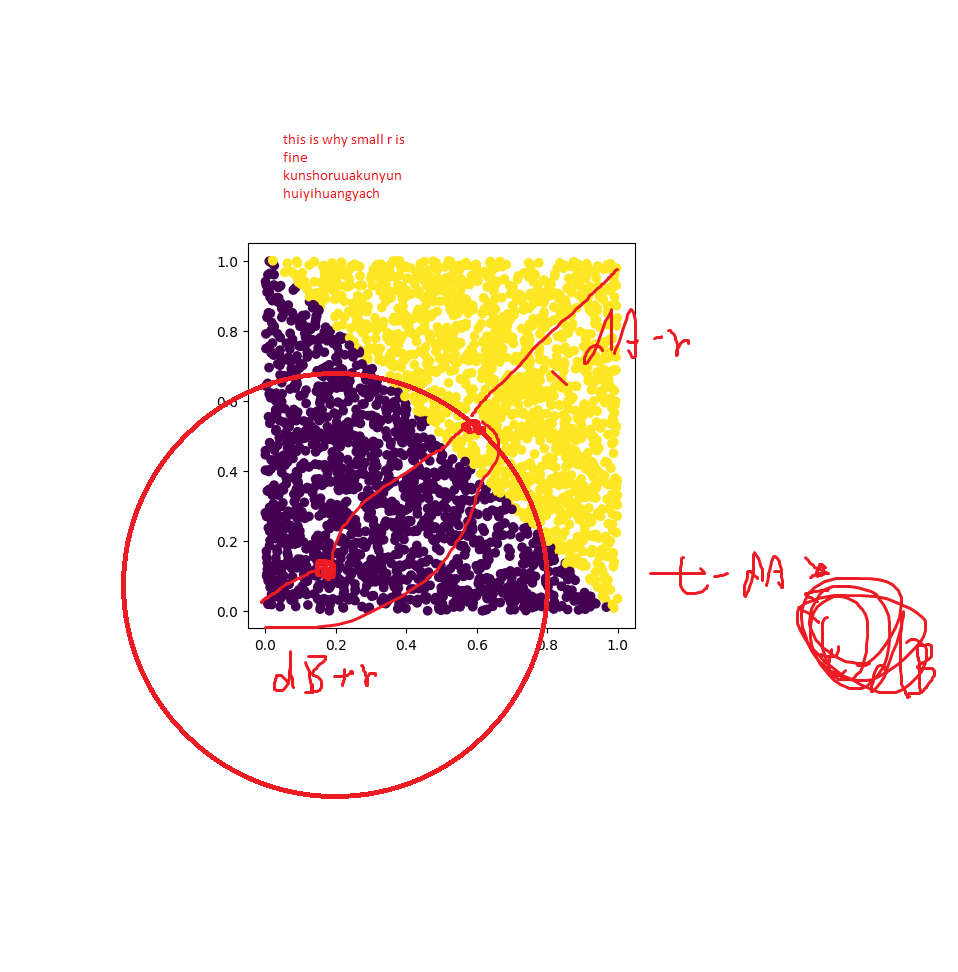